# Deeltoets2 Toegepaste Machine Learning
**Bachelor Informatiekunde**

## Tentameninformatie

**Datum:** 2023
**Tijd:** 2 uur  (+30 minuten extra tijd)


**Toegestane hulpmiddelen:** Boek als PDF op computer, Kladpapier, handgeschreven spiekbrief (1 A4, 1 kant beschreven)

## Huishoudelijke mededelingen
* Je mag tot uiterlijk 30 minuten na de begintijd starten.
* Jouw telefoon, jas en tas liggen in de kluisjes buiten de tentamenzaal.
* De eerste 30 minuten en de laatste 15 minuten mag je de zaal niet verlaten. Daarbuiten kan je als je het tentamen af  en ingeleverd hebt de zaal verlaten.
* De ondersteuning voorin de zaal kan controleren of jouw tentamen correct is ingeleverd.
* Plaats jouw collegekaart of een geldig legitimatiebewijs op de hoek van de tafel. Een surveillant komt langs om deze te controleren.
* Toiletbezoek is alleen mogelijk met toestemming van een surveillant.

## Spiekbrief

* Laat die liggen, die lever je in.

## Punten

* Elke vraag is 1 punt waard, tenzij er wat anders bijstaat.
* Bij deelvragen krijg je in de regel een evenredig deel van de punten.

## Notebook made by

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Copieer ook geen cellen. Dit levert problemen op bij nakijken. Je mag wel cellen toevoegen (als kladblaadje).
* Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from scipy.stats import mode
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
# testing
from nose.tools import assert_count_equal, assert_equal, assert_almost_equals
from numpy.testing import *
from pandas.testing import assert_frame_equal

# Please do not remove this: 
np.random.seed(31415)

# 1 The sigmoid (2pt)

Here is the sigmoid function $f(x)$ again:

$$f(x)= \frac{1}{1+e^x}.$$

1. What is the range and the domain of $f(x)$? 
    * Put your answer in the markdown cell below. 
2. Create a dict `D` with keys `range(-10,10)` and as values the sigmoid of the key.
3. Plot that function.
    * Put your answers in the code cell below.

**Hint:** think of `np.exp`.

The range is - unlimited to unlimited and the domain is from 0 to 1, but 0 and 1 will never be reached.

{-10: 0.9999546021312976, -9: 0.9998766054240137, -8: 0.9996646498695336, -7: 0.9990889488055994, -6: 0.9975273768433653, -5: 0.9933071490757153, -4: 0.9820137900379085, -3: 0.9525741268224334, -2: 0.8807970779778823, -1: 0.7310585786300049, 0: 0.5, 1: 0.2689414213699951, 2: 0.11920292202211755, 3: 0.04742587317756678, 4: 0.01798620996209156, 5: 0.0066928509242848554, 6: 0.0024726231566347743, 7: 0.0009110511944006454, 8: 0.0003353501304664781, 9: 0.00012339457598623172}


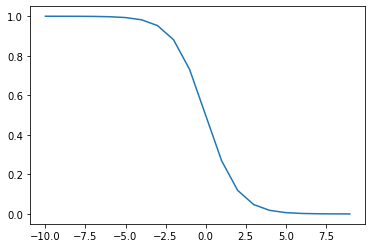

In [2]:
D= dict()
for i in range(-10,10):
    D[i] = 1 / (1 + np.exp(i))
        
print(D)


Ddf=pd.Series(D)

# Plot f(x) for x in range(-10,10)
x = range(-10,10)
y = 1 / (1 + np.exp(x))
fig, ax = plt.subplots()
ax.plot(x,y)

# 2 Logistic regression 1 (4pt)

Below we load  the penguin classification dataset, in which we want to learn to classify the `species`.


1. How many classes are there in the dataset? (variable `classes`)
2. How many instances are there in the dataset? (variable `instances`)
3. If we would do logistic regression with only the numeric variables, how many parameters (those $\theta$'s) will regression learn? Hint: write down the regression equation. (variable `parameters_numeric`)
4. And how many if we use all variables in the dataset and one-hot encode the categorical ones (variable `parameters_all`).

**Hint**: `p` is a pandas dataframe, and has all pandas functionality. E.g., `value_counts`. And you can easily select columns using method syntax, e.g, `p.species`.

In [3]:
p=sns.load_dataset('penguins')
print(p.shape)
p.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
classes=7 # change into your answer
instances=344
parameters_numeric=8
parameters_all=14

for v in [classes,instances,parameters_numeric,parameters_all]:
    print(v)

7
344
8
14


In [5]:
try:
    for v in [classes,instances,parameters_all,parameters_numeric]:
        assert isinstance(v,int)
except Exception as e: print(e)
 
   

# 3 Data preparation (3pt)

We look again at the penguins dataset. We call this dataframe `p`.

1. Which variables contain missing values? (variable `Vmissing`) 
2. If needed, impute the numeric variables with the mean value and the categorical with the mode (the most often occuring value).  Give the imputation values for the variablles with missing values in a dict `impute_values` of the form `{'column_name': imputation value}`.
3. For further processing simply remove the rows with missing values using `p.dropna(inplace=True)`.
4. Now Z-normalize all numeric values in p. (Z-normalization is what the sklearn's StandardScalar does). You name  the new dataframe with only the numeric columns with their  normalized values  `pz`.

In [15]:
Vmissing=set() # put the column names with missing data in this set.
impute_values = dict()
missing = []



impute_values["species"] = mode(p.species)[0][0]
impute_values["island"] = mode(p.island)[0][0]
impute_values["bill_length_mm"] = np.mean(p.bill_length_mm)
impute_values["bill_depth_mm"] = np.mean(p.bill_depth_mm)
impute_values["flipper_length_mm"] = np.mean(p.flipper_length_mm)
impute_values["body_mass_g"] = np.mean(p.body_mass_g)

print(impute_values)

for i in p:
    if np.nan(p[i]) == True:
        V.append[i]
Vmissing = set(missing)

print(Vmissing)


{'species': 'Adelie', 'island': 'Biscoe', 'bill_length_mm': 43.992792792792805, 'bill_depth_mm': 17.16486486486487, 'flipper_length_mm': 200.96696696696696, 'body_mass_g': 4207.057057057057}


TypeError: 'float' object is not callable

In [16]:
# keep this
p.dropna(inplace=True)  # remove all rows with at least one missing value

pz=p[['bill_depth_mm', 'bill_length_mm',  'body_mass_g', 'flipper_length_mm']].copy()  
# now further work on pz to give your solution. Keep these columns in this order

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(pz)
pz = scaler.transform(pz)
pz = pd.DataFrame(data = pz, index = range(0,333), columns = ["bill_depth_mm", "bill_length_mm", "body_mass_g", "flipper_length_mm"])
pz.head()

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
0,0.780732,-0.896042,-0.568475,-1.426752
1,0.119584,-0.822788,-0.506286,-1.069474
2,0.424729,-0.676280,-1.190361,-0.426373
3,1.085877,-1.335566,-0.941606,-0.569284
4,1.747026,-0.859415,-0.692852,-0.783651


In [17]:
try:
    assert isinstance(Vmissing,set)
    assert Vmissing.issubset(set(p.columns))
    assert isinstance(impute_values,dict)
    assert pz.shape==(333, 4)
    assert_array_equal(list(pz.columns), ['bill_depth_mm', 'bill_length_mm',  'body_mass_g', 'flipper_length_mm'])
except Exception as e: print(e)


# 4 Decision trees (4pt)

Now we will predict the species in the penguin dataset.

1. First run the cell below to make the X and y sets.
2. Split X and y into train and test sets using a 2/3, 1/3 split using `train_test_split` with `random_state=0`.
3. Then use the `DecisionTreeClassifier(random_state=0)` to train a classifier, and compute its accuracy in variable `accuracy_testset`.
4. Then create the report with all precision, recall and F1  values for each class
5. Finally make a confusion matrix and print it nicely with `sns.heatmap`.

In [9]:
X= pz.values
p.dropna(inplace=True) 
y= p.species.astype('category').cat.codes.values  # here we just replace the species names with integers
# check: X and y have the same number of rows, and both no missing values

X.shape,y.shape, np.isnan(X).sum(), np.isnan(y).sum()

((333, 4), (333,), 0, 0)

In [10]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest= None,None,None,None # change to your solution
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.33, random_state = 0)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((223, 4), (110, 4), (223,), (110,))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state = 0)

accuracy_testset = cross_val_score(clf, Xtest, ytest) 

accuracy_testset 

array([1.        , 0.95454545, 0.86363636, 0.95454545, 1.        ])

In [19]:
try: 
    assert 0<= accuracy_testset <= 1
except Exception as e: print(e)
    

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


# the report with all precision, recall and F1  values for each class

Make it in the cell below

In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y[range(223,333)], ytest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.34      0.50       110

    accuracy                           0.34       110
   macro avg       0.33      0.11      0.17       110
weighted avg       1.00      0.34      0.50       110



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# The confusion matrix nicely  printed with `sns.heatmap`

* in thecell below

<AxesSubplot:>

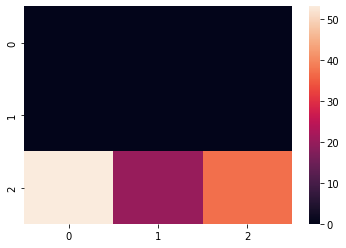

In [14]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y[range(223,333)], ytest))